In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

### Load in Dataset

In [79]:
# Master Dataset
df = pd.read_csv('data/master_df.csv')

# Separate Datasets by Position
qbs = df[df['Position'] == 'QB']
rbs = df[df['Position'] == 'RB']
wrs = df[df['Position'] == 'WR']
tes = df[df['Position'] == 'TE']

# Model Development/Exploration

## Regressions

In [105]:
# Prep Dataset for Regressions with train_test_split
# To define the input and output feature
qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qb_reduced_df.dropna()
col_names = qb_reduced_df.columns
scaler = StandardScaler()
qb_reduced_normed = scaler.fit_transform(qb_reduced_df)
qb_reduced_df_normed = pd.DataFrame(qb_reduced_normed, columns=col_names)
x = qb_reduced_df_normed.drop('Fantasy_PPR', axis=1)
#x = np.column_stack([np.ones(len(x)),x.iloc[:,0].values.reshape(1,-1)[0]])
y = qb_reduced_df_normed['Fantasy_PPR']
#y = y.values.reshape(1,-1)

sns.pairplot(qb_reduced_df_normed, hue='POSTSEASON')
#x_normed = scaler.fit_transform(x)
#y_normed = scaler.fit_transform(y)

# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)




ValueError: Found input variables with inconsistent numbers of samples: [551, 1]

Mean squared error: 333.14
Coefficient of determination: 0.97
               Coefficients
Passing_TD%       16.946966
Passing_Int%     -24.687996
Passing_1D         1.174730
Passing_Lng       -0.038177
Passing_Y/A       69.504316
Passing_AY/A     -74.350120
Passing_Y/C        0.008742
Passing_Sk        -0.360769
Passing_Sk%        1.251611
Passing_NY/A     -20.110926
Passing_ANY/A     26.441056
Rushing_1D         2.366212
Rushing_Lng        0.129022
Rushing_Y/A_y      0.709087


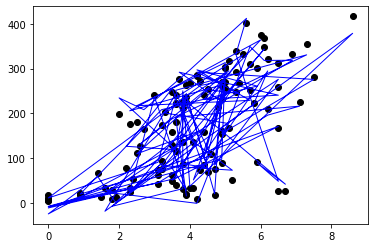

In [96]:
# Ordinary Least Squares using using fit and predict
ols_reg = LinearRegression()
model_ols = ols_reg.fit(x_train,y_train)
y_preds_ols = model_ols.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds_ols))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds_ols))
# Print Importance Coefficients
cdf = pd.DataFrame(model_ols.coef_, x.columns, columns=['Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test.iloc[:,0].values, y_test, color="black")
plt.plot(x_test.iloc[:,0].values, y_preds_ols, color="blue", linewidth=1)

plt.show()

The R-squared Score was: 0.9743738274803329

               Coefficients
Passing_TD%       30.860867
Passing_Int%     -42.120022
Passing_1D        92.627401
Passing_Lng       -0.698704
Passing_Y/A       69.866118
Passing_AY/A    -124.289801
Passing_Y/C        0.011763
Passing_Sk        -5.254802
Passing_Sk%        3.951705
Passing_NY/A     -22.296069
Passing_ANY/A     44.473711
Rushing_1D        26.283069
Rushing_Lng        1.758415
Rushing_Y/A_y      1.843986


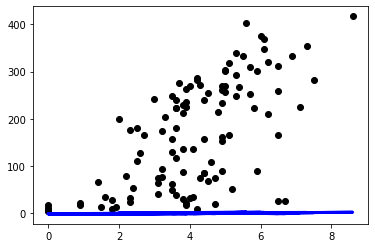

In [95]:
# Ordinary Least Squares using makepipeline (MUST HAVE DATA PRESCALED)
qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qb_reduced_df.dropna()
x = qb_reduced_df.drop('Fantasy_PPR', axis=1)
y = qb_reduced_df['Fantasy_PPR']
# train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
# Make pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
# Fit Model
pipe.fit(x_train,y_train)
# Print Score
print("The R-squared Score was: "+str(pipe.score(x_test,y_test)))
print('')
# Print Importance Coefficients
cdf = pd.DataFrame(pipe.named_steps['linearregression'].coef_, x.columns, columns=['Coefficients'])
print(cdf)

# Plot outputs
plt.scatter(x_test[:,np.newaxis], y_test, color="black")
plt.plot(x_test.iloc[:,0].values, y_preds_ols, color="blue", linewidth=3)

plt.show()

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

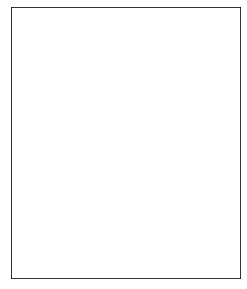

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

qb_reduced_df = qbs[['Passing_TD%','Passing_Int%','Passing_1D','Passing_Lng','Passing_Y/A','Passing_AY/A','Passing_Y/C','Passing_Sk','Passing_Sk%','Passing_NY/A','Passing_ANY/A','Rushing_1D','Rushing_Lng','Rushing_Y/A_y','Fantasy_PPR']]
qb_reduced_df = qb_reduced_df.dropna()
col_names = qb_reduced_df.columns
scaler = StandardScaler()
qb_reduced_normed = scaler.fit_transform(qb_reduced_df)
qb_reduced_df_normed = pd.DataFrame(qb_reduced_normed, columns=col_names)

x = qb_reduced_df.drop('Fantasy_PPR', axis=1)
y = qb_reduced_df['Fantasy_PPR']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

degrees = [1, 4, 14]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(x.iloc[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, x.iloc[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(x_test, pipeline.predict(x_test.iloc[:, np.newaxis]), label="Model")
    plt.plot(x_test, y_test, label="True function")
    plt.scatter(x, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()